In [2]:
import numpy as np
import pandas as pd
import math
from math import e
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Task 1

In [3]:
#Task 1
dataSet = pd.read_csv('/content/AB_NYC_2019.csv')
dataSet.drop_duplicates()
# drop the duplicate rows

print(dataSet.isna().sum())
# find which row is null, which means missing value
# the name and host_name have missing value, delete them
dataSet = dataSet.loc[dataSet["host_name"].isna() == False]
dataSet = dataSet.loc[dataSet["name"].isna() == False]


#Based on the csv, there is anormal about "availability_365" 
#some Airbnbs are 0
# it is impossible  
# this is outlier
dataSet = dataSet.loc[dataSet["availability_365"] != 0]


#Based on the csv, there is anormal about "price" 
#Some Airbnbs are 0
#it is impossible  
# this is outlier
dataSet = dataSet.loc[dataSet["price"] != 0]



id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


# Task 2


In [4]:
#task 2
# a> top5 and bottom 5

neighbourhood = np.array(dataSet['neighbourhood'])
unique_neigh = set(neighbourhood)
neighPrice = []

for i in unique_neigh:
  neighPrice.append([i, 0, 0])

indexes = dataSet.index
# since some data is clean, it is necessary to use index to find element


for i in indexes:
  for j in range(len(neighPrice)):
    if dataSet.at[i, 'neighbourhood'] == neighPrice[j][0]:
      neighPrice[j][1] += dataSet.at[i, 'price']
      neighPrice[j][2] += 1
      break

for i in range(len(neighPrice)):#at here I use mean to represent price
  neighPrice[i][1] = neighPrice[i][1]/neighPrice[i][2]
  

neighPrice.sort(key = lambda x: x[1])
#sort data, so that it is easy to find top5 and bottom5

index = 0
while index < len(neighPrice):
  if neighPrice[index][2] <= 5:
    neighPrice.pop(index)#delete the data whose listings less than 5
    continue
  index += 1

print("Bottom 5 neighborhood: ", neighPrice[0][0], ", ", neighPrice[1][0], ", ",
      neighPrice[2][0], ", ", neighPrice[3][0], ", ", neighPrice[4][0] )


print("Top 5 neighborhood: ", neighPrice[-1][0], ", ", neighPrice[-2][0], ", ",
      neighPrice[-3][0], ", ", neighPrice[-4][0], ", ", neighPrice[-5][0] )







Bottom 5 neighborhood:  Hunts Point ,  Soundview ,  Bronxdale ,  Tremont ,  Grant City
Top 5 neighborhood:  Riverdale ,  Tribeca ,  Battery Park City ,  Flatiron District ,  Randall Manor


# Task2 part b

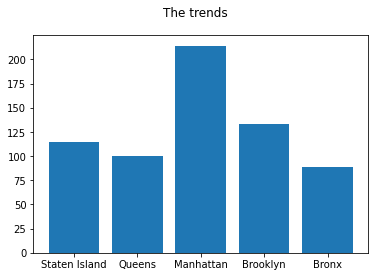

In [5]:
# b> 


neighbourhood_group = np.array(dataSet['neighbourhood_group'])
unique_group = set(neighbourhood_group)
groupPrice = []

for i in unique_group:
  groupPrice.append([i, 0, 0])


indexes = dataSet.index


for i in indexes:
  for j in range(len(groupPrice)):
    if dataSet.at[i, 'neighbourhood_group'] == groupPrice[j][0]:
      groupPrice[j][1] += dataSet.at[i, 'price']
      groupPrice[j][2] += 1
      break


names = []
values = []
for i in range(len(groupPrice)):
  groupPrice[i][1] = groupPrice[i][1]/groupPrice[i][2]
  names.append(groupPrice[i][0])
  values.append(groupPrice[i][1])


plt.figure()

plt.bar(names, values)
plt.suptitle('The trends')
plt.show()

#from the bar chart, we can find Manhattan has the highest price
# Average price is more than 200.
# next is brooklyn, which average price is around 130
# The third one is Staten Island.
# The last two is Queens and Bronx, which average price are 100 and 80 seperately.



# Task 3

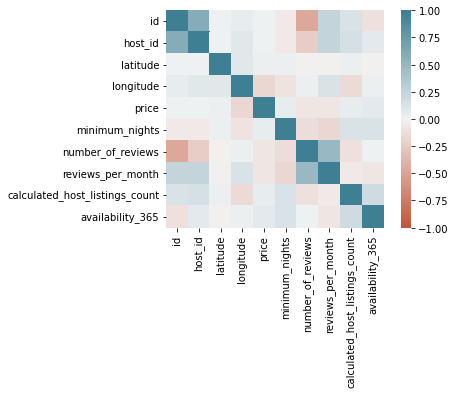

In [6]:
#3> correlation

corr = dataSet.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=100),
    square=True
)


#The colder color means positive correlation
#the warm mean negative correlation
#most pair do not have relative correlation


# Task 4


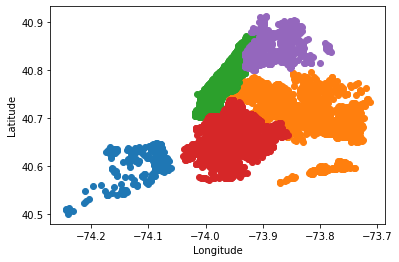

In [7]:
# 4>
# Part A

neighbourhood_group = np.array(dataSet['neighbourhood_group'])
unique_group = set(neighbourhood_group)
groupPrice = []
groupPoint_Latitude = []
groupPoint_Longitude = []

for i in unique_group:
  groupPrice.append(i)
  groupPoint_Latitude.append([])
  groupPoint_Longitude.append([])

indexes = dataSet.index

for i in indexes:
  for j in range(len(groupPrice)):
    if dataSet.at[i, 'neighbourhood_group'] == groupPrice[j]:
      groupPoint_Longitude[j].append(dataSet.at[i, 'longitude']) 
      groupPoint_Latitude[j].append(dataSet.at[i, 'latitude']) 
      
      break

for i in range(len(groupPoint_Longitude)):
  plt.scatter(groupPoint_Longitude[i], groupPoint_Latitude[i])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()




# Task 4 Part B

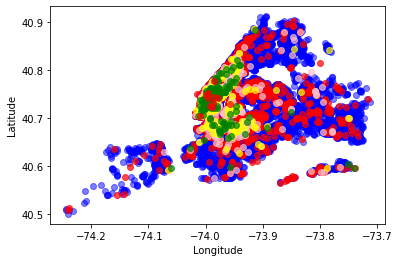

In [8]:
# 4>
# Part B

price = np.array(dataSet['price'])
unique_price = set(price)
priceGroup = []
pricePoint_Latitude = []
pricePoint_Longitude = []

for i in unique_price:
  if i < 1000:
    priceGroup.append(i)
    pricePoint_Latitude.append([])
    pricePoint_Longitude.append([])

indexes = dataSet.index

for j in range(len(priceGroup)):
  pricePoint_Longitude[j].append(dataSet.loc[dataSet['price'] == priceGroup[j], ['longitude']]) 
  pricePoint_Latitude[j].append(dataSet.loc[dataSet['price'] == priceGroup[j], ['latitude']]) 


#colors = np.random.rand(len(priceGroup))
for i in range(len(pricePoint_Latitude)):
  if priceGroup[i] <200 and priceGroup[i] >= 0:
    plt.scatter(pricePoint_Longitude[i], pricePoint_Latitude[i], c = "blue", alpha=0.5)
  elif priceGroup[i] <400 and priceGroup[i] >= 200:
    plt.scatter(pricePoint_Longitude[i], pricePoint_Latitude[i], c = "red", alpha=0.7)
  elif priceGroup[i] <600 and priceGroup[i] >= 400:
    plt.scatter(pricePoint_Longitude[i], pricePoint_Latitude[i], c = "pink", alpha=0.7)
  elif priceGroup[i] <800 and priceGroup[i] >= 600:
    plt.scatter(pricePoint_Longitude[i], pricePoint_Latitude[i], c = "yellow", alpha=0.7)
  else:
    plt.scatter(pricePoint_Longitude[i], pricePoint_Latitude[i], c = "green", alpha=0.7)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#we can find most point is blue, which means from 0 to 200
#Besides, in manhattan, the price is more expensive than other area

# Task 5

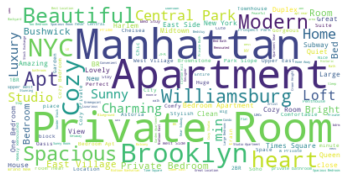

In [9]:
# 5>

name = np.array(dataSet['name'])
text = " ".join(name)

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Task 6

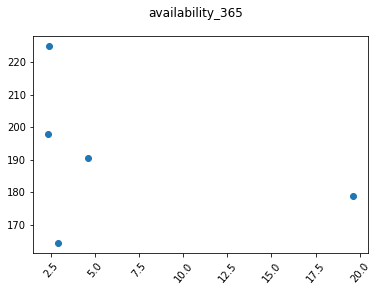

-0.3388884080154628


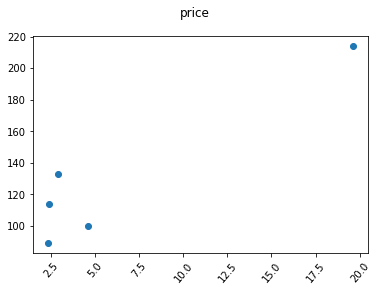

0.932370500159863


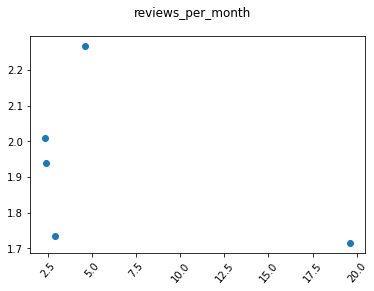

-0.4629485464514941


In [10]:
# 6>

group = dataSet.groupby("neighbourhood_group")
group.describe().head()
group.mean().sort_values(by="calculated_host_listings_count",ascending=False).head()


# About the area, I choose the neighbourhood_group
# I use mean to find whose number is highest


# from this describtion, Manhattan is has the busiest host
# since it has the most number of mean listings that are 19.6



# availability_365 
plt.figure()
plt.scatter(group.mean()["calculated_host_listings_count"], group.mean()["availability_365"])
plt.suptitle('availability_365')
plt.xticks(rotation=50)
plt.show()
print(group.mean()["calculated_host_listings_count"].corr(group.mean()["availability_365"]))

# the correlation between "calculated_host_listings_count" and "availability_365"
# is -0.3388884080154628



# price 
plt.figure()
plt.scatter(group.mean()["calculated_host_listings_count"], group.mean()["price"])
plt.suptitle('price')
plt.xticks(rotation=50)
plt.show()
print(group.mean()["calculated_host_listings_count"].corr(group.mean()["price"]))

# the correlation between "calculated_host_listings_count" and "price"
# is 0.932370500159863



# reviews_per_month
plt.figure()
plt.scatter(group.mean()["calculated_host_listings_count"], group.mean()["reviews_per_month"])
plt.suptitle('reviews_per_month')
plt.xticks(rotation=50)
plt.show()
print(group.mean()["calculated_host_listings_count"].corr(group.mean()["reviews_per_month"]))\

# the correlation between "calculated_host_listings_count" and "reviews_per_month"
# is -0.4629485464514941





# Task 7

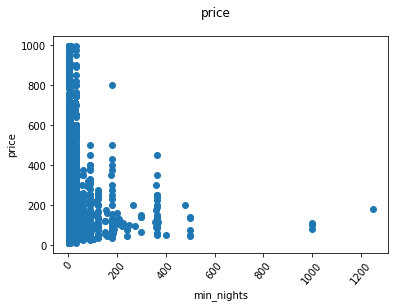

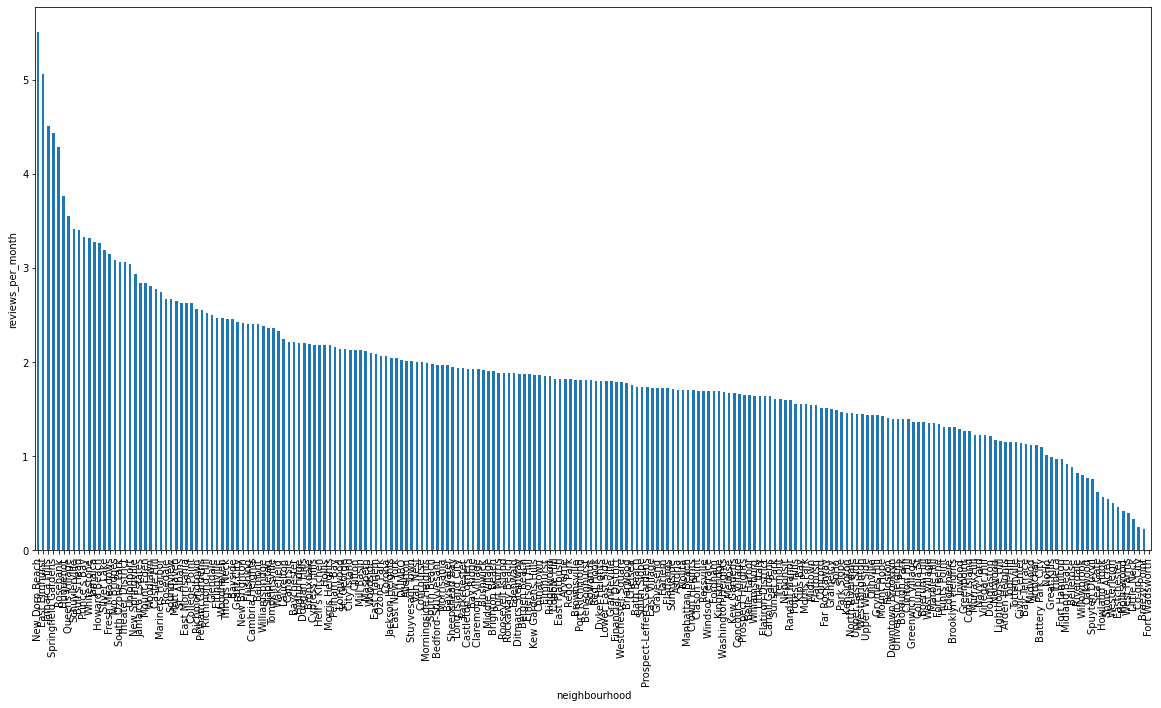

In [11]:
#7>
#first
# in the first one, I choose the price and min_nights
# besides, the price is less than 1000
# using scatter chart to represent this relationship
copyData = dataSet.loc[dataSet['price'] < 1000]
price = np.array(copyData['price'])
min_nights = np.array(copyData['minimum_nights'])

plt.figure()
plt.scatter(min_nights, price)
plt.suptitle('price')
plt.xlabel("min_nights")
plt.ylabel("price")
plt.xticks(rotation=50)
plt.show()






#second
# in the second one, I choose the neighbourhood and reviews_per_month
# besides, I use mean of reviews_per_month to represent one area
# using bar chart to represent this relationship

group = dataSet.groupby("neighbourhood")
group.describe().head()
group.mean().sort_values(by="reviews_per_month",ascending=False).head()

plt.figure(figsize=(20,10))
group.mean().sort_values(by="reviews_per_month",ascending=False)["reviews_per_month"].plot.bar()

plt.xlabel("neighbourhood")
plt.ylabel("reviews_per_month")
plt.show()






